# Chapter3 Multiple Regression analysis
----

## Initialization
***

### 초기 개발환경 세팅을 위한 준비 및 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
%matplotlib inline
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names) # 데이터 Frame화는 필수!!! 첫번째 각각의 새로줄에  columns에 기능 이름들을 였자
dataset['target'] = boston.target


공공 데이터인 sklearn.dataset중에서 load_boston을 불러오자!!!  
`from sklearn.datasets import load_boston`  패키지를 불러올 때 모듈 전체를 가져오는게 아니라 변수만 가져오려고 하는 것이다!  
밑에 dataFrame의 예제를 통해 모듈사용 법을 익혀보자!!

In [4]:
df = pd.DataFrame(data=np.array([[1,2,3],[4,5,6],[7,8,9]]),index=[2, 'A', 4], columns=[48,49,50])
display(df)  


,48,49,50
2,1,2,3
A,4,5,6
4,7,8,9


In [6]:
observations = len(dataset) # dataset 길이 측정
variables = dataset.columns[:-1] # 세로줄 항목 단어들 불러옴
X = dataset.iloc[:,:-1] # iloc : 값보기 -1 하는 이유 마지막 y값 타겟을 빼기 위해
y = dataset['target'].values    # target value를 불러와보자

이제 X와 y값에 뭐가 저장되어있는지 보자

In [8]:
display(X)
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

X값에는 각 항목별로 특징들이 나타나고
y값에는 X값을 구할때 뺀 마지막 column 값들이 저장되어있다.

ix -> iloc  
 [[:,:]] -> row, column 둘다 전부 불러오겠다.  
 [[:,:-1]] -> row, column -1 을 전부 불러오겠다.(target값을 빼기 위해) 

## Using multiple features

In [10]:
import statsmodels.api as sm            
import statsmodels.formula.api as smf
Xc = sm.add_constant(X)   # X데이타를 api에 였자
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

앞에서 Statsmodels를 사용한 것처럼 패키지에서 필요한 모듈을 다시 로드(하나는 행렬로, 다른 하나는 수식으로 작업)  
api 사용하니 이마이 편하다....  


In [12]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        15:10:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

여기서 R-squared와 Adj R-squared를 살펴 보아야한다.   
**R-squared** : 회귀선이 얼마나 적합하게 모델링이 되어 있는지를 유추해서 볼수 있게한다.  
　  
R-square : $$ R^2=\frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$이다.  
여기서 `SSE`는 `Sum of Square Error`로 회귀식과 실제값의 차이를 의미한다. 

### Correlation matrix

In [14]:
correlation_matrix = X.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


** 추신수 jupyter note book에서는 저장된 행렬이나 벡터가 있으면 print를 통해서 뽑기 보다 변수명을 입력하는 것 또는 display()를 통해 보는 것이 가독성 좋게 나옴 **

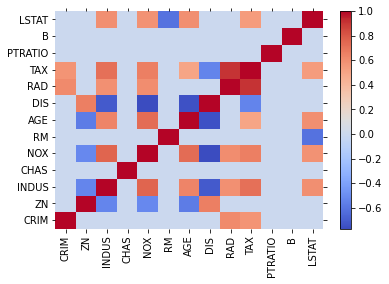

In [16]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=1)
    heatmap.axes.set_frame_on(False) 
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False) # R.shape[0] 행 수를 제공, minor False를 하면 데이터 이름 제공 아니면 숫자 제공
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False) # R.shape[1] 열 수를 제공  minor 뭘뜻할까
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5) #hurdle 일정 수준이상이 되어야 상관관계 표시 

In [18]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr) 

print (eigenvalues)
print (eigenvectors[:,8])

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]
[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


`np.linalg.eig` 고유벡터, 고유 값 구하기


## Revisiting gradient descent

In [20]:
from sklearn.preprocessing import StandardScaler #sckit-learn 전러치 기능

observations = len(dataset)
variables = dataset.columns

standardization = StandardScaler() # 평균과 표준 편차가 1이 되도록 변환
Xst = standardization.fit_transform(X)

original_means = standardization.mean_
original_stds = standardization.var_**.5

Xst = np.column_stack((Xst,np.ones(observations)))
y  = dataset['target'].values

In [22]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.02
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))

These are our final standardized coefficients: -0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328


![비표준화계수](img3/비표준화계수.PNG)  
선형회귀분석에서 표준화된 계수 벡터와 편향이 주어지면, 선형회귀 공식을 호출할수 있고 평균 및 표준편차를 사용해 예측 변수를 변환하는 이전 공식은 몇 번의 게산을 거치면 식이 나온다. 이를 파이썬 코드로 다 계산 안하고 구할 수 있다.

In [24]:
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias  = w[-1]-np.sum((original_means / original_stds) * w[:-1])

print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

bias:  36.4595
    CRIM:  -0.1080
      ZN:   0.0464
   INDUS:   0.0206
    CHAS:   2.6867
     NOX: -17.7666
      RM:   3.8099
     AGE:   0.0007
     DIS:  -1.4756
     RAD:   0.3060
     TAX:  -0.0123
 PTRATIO:  -0.9527
       B:   0.0093
   LSTAT:  -0.5248


## Figuring out importat features

### Working with standardized coefficients

In [26]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True) # normalize : 0과 1사이의 범위에 있는 모든 변수의 크기를 재조정할지 여부를 나타낸다. x - xmin/ xmax -xmin
# Zero score Standardization = x - xmean/ xstd

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression) # make_pipeline = wrapper 

In [30]:
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))  # 표준화 이전 상관계수

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [32]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in \
    sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), \
                    dataset.columns[:-1]), reverse=True):
    print("%6.3f %s" % (coef,var)) #표준화 하여 상관계수 측정

3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


### Using R squared

In [34]:
from sklearn.metrics import r2_score

linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y)) # R2 값 기록

Baseline R2: 0.741


In [36]:
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) -r2_est(X.values[:,selection],y)) ,dataset.columns[j])) 
    
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname)) # 예측 변수 집합으로 부터 한번에 한개의 변수를 제거하면서 해당 결정 계수를 기록 한 회귀모델을 다시 추정해 기준값에서 뻇다.

0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


## Interaction model

선형 관계가 좋은 근사 방법이긴 하지만, 흔시 실제 데이터에서 사실이 아닌 단순화한 경우가 있다. 하지만 대부분의 관계는 선형적이지 않으며, 굴곡과 곡선을 보이고 증가와 감소의 변동이 번갈아 나타난다. 예측변수와 응답의 유사성이 높을수록 학습 집합의 적합성이 높아지고 예측오차가 줄어든다.  
* 예측변수를 다양한 방법으로 변환해 선형회귀를 개선할 수 있다.
* 모든 변환이 잔차오차의 양에 영향을 미치고 궁극적으로 결정계수에 영향을 미치므로, 부분 R^2을 사용해 이런 개선을 측정할 수 있다.

비선형성의 첫 번째 원인 중 하나는 예측변수 사이에 발생하는 상호작용 때문이다.  
![상호작용](img3/상호작용모델예제_두개예측변수.PNG)

위 식처럼 두 개의 예측변수를 가진 모델 예제에서 표현한 것처럼 관계의 추가 정보를 얻기 위해 곱해져야 한다.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False) # degree 파라미터를 통해 상호작요에 투입할 변수의 수를 정의하며 3개 이상의 변수가 서로 상호작용할 수 있다.

In [40]:
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

baseline = r2_est(X,y)
print ('Baseline R2: %0.3f' %  baseline)

Baseline R2: 0.741


In [42]:
Xi = create_interactions.fit_transform(X) # 새로운 입력 데이터 행렬을 생성하고 원래 데이터에 모든 변수의 상호작용 효과를 부여한다.
main_effects = create_interactions.n_input_features_ 

In [44]:
for k,effect in \
    enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[:-1][effect==1] # variables에서 target은 빼야됨
    increment = r2_est(Xi[:,list(range(0,main_effects)) \
                + [main_effects+k]],y) - baseline
    if increment > 0.01:
        print ('Adding interaction %8s *%8s R2: %5.3f' %  (termA, \
                termB, increment))

Adding interaction     CRIM *    CHAS R2: 0.011
Adding interaction     CRIM *      RM R2: 0.021
Adding interaction       ZN *      RM R2: 0.013
Adding interaction    INDUS *      RM R2: 0.038
Adding interaction    INDUS *     DIS R2: 0.013
Adding interaction      NOX *      RM R2: 0.027
Adding interaction       RM *     AGE R2: 0.024
Adding interaction       RM *     DIS R2: 0.018
Adding interaction       RM *     RAD R2: 0.049
Adding interaction       RM *     TAX R2: 0.054
Adding interaction       RM * PTRATIO R2: 0.041
Adding interaction       RM *       B R2: 0.020
Adding interaction       RM *   LSTAT R2: 0.064


In [46]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print ('R2 of a model with RM*LSTAT interaction: %0.3f' %  r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805


## Polynomial regression

상호작용의 확장  　
　  
다항식 확장은 원래 변수의 상호작용 및 비선형 거듭제곱 변환을 모두 생성하는 자동적인 수단을 체계적으로 제공한다.　  

단순 선형회귀  
![단순선형회귀](img3/단순선형회귀.PNG)  
2차  
![2차](img3/2차.PNG)  
3차  
![3차](img3/3차.PNG)  
다중회귀  
![다중회귀](img3/다중회귀.PNG)  
　  
* 다항식 확장은 예측변수의 수를 빠르게 증가시킨다.  
* 더 높은 차수의 다항식은 예측변수의 높은 거듭제곱으로 해석돼 숫자 안정성에 문제가 있으므로 적절한 숫자 형식이 필요하거나 아주 큰 숫자값을 표준화해야 한다.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True) # 단순 선형
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False) # 3차
create_highdegree = PolynomialFeatures(degree=7, interaction_only=False, include_bias=False) # 7차
linear_predictor = make_pipeline(linear_regression)  #선형 회귀
#quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression) 

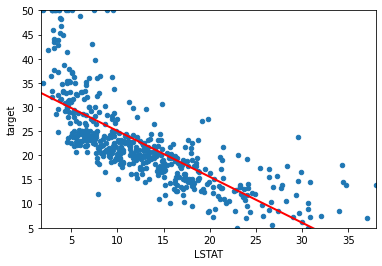

In [50]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((500,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

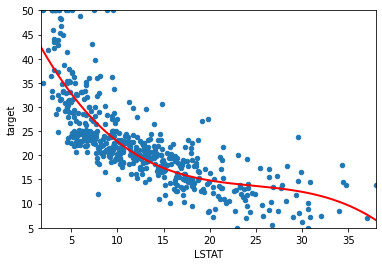

In [52]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2) # 3차 변환

In [54]:
for d in [1,2,3,5,15]:
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x,y)
    print ("R2 degree - %2i polynomial :%0.3f" %(d,r2_score(y,model.predict(x))))

R2 degree -  1 polynomial :0.544
R2 degree -  2 polynomial :0.641
R2 degree -  3 polynomial :0.658
R2 degree -  5 polynomial :0.682
R2 degree - 15 polynomial :0.695


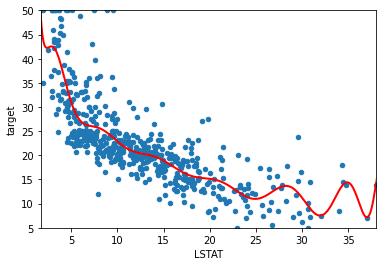

In [56]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)

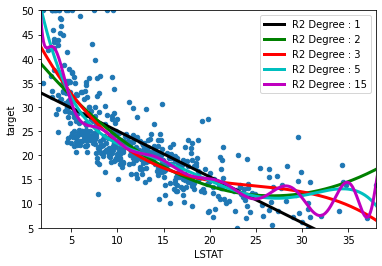

In [58]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target',
                      xlim=x_range, ylim=y_range)

color = iter(['k','g','r','c','m'])

for d in [1,2,3,5,15] : 
    create_poly = PolynomialFeatures(degree=d,
                                     interaction_only=False,
                                     include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(),
                         linear_regression)
    model = poly.fit(x,y)
    regr_line = scatter.plot(xt,model.predict(xt),
                        '-', color=next(color), linewidth=3,
                        label='R2 Degree : '+str(d) )
    
scatter.legend(loc='best')
plt.show()

과도한 파라미터화로 인한 성능 저하는 선형회귀 및 기타 많은 머신 러닝 알고리즘의 문제다.

Overfitting, underfitting 조심  
끝


In [60]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print ('R2 of a model with RM*LSTAT interaction: %0.3f' %  r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805
